# *Acidentes registrados no Brasil em 2020*


## Trabalho realizado por: Victor Melo #

### Os dados desse Dataset cobre o período de 2020 (Janeiro a Setembro) e foi extraído diretamente do site da Polícia Rodoviária Federal ##

### *Os dados estão disponíveis em:*
### *https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes* ###


## Primeiro é preciso realizar a instalação do python (independente da versão) e habilitar ele ao Path de seu computador ##
 ## Coloquei uma imagem abaixo para facilitar ##
![Habilitar o Path](https://dicasdepython.com.br/images/como-instalar-python-no-windows-10/instalador-python-01-selecao-do-tipo-de-instalacao.png)

-------------------------------------------------------------------------------------------------------------------------------
## Agora, vamos realizar algumas importações dos módulos necessários para a análise. ##

### Vale lembrar que se houver algum problema com as importações, você não deve esquecer de habilitar seu Python com o Path, abrir seu CMD e digitar "Pip install  _nome_do_módulo_". Após você fizer todas as instalações necessárias, já podemos começar as análises ###

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Aqui vamos usar 4 módulos: Pandas, Seaborn, Numpy e o Matplotlib. É legal falar que estamos dando _"Apelidos"_ a eles para realizar a chamada de forma mais fácil. ###


## Após as importações, vamos ler nosso arquivo, atribuir a uma variável chamada "df" e já verificar algumas informações Básicas ##

In [3]:
arq = r'C:\Users\Pichau\Documents\DMCard\trabalho_dm\acidentes2020_todas_causas_tipos.csv'
df = pd.read_csv(arq, delimiter=';', encoding = 'iso-8859-1')

### Vamos realizar uma leitura de nosso dataset de forma geral para conseguirmos ter idéias para analisármos de uma melhor forma. ###

In [6]:
df.sample(5)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
262756,309335.0,687526.0,2020-08-30,domingo,18:15:00,RR,432.0,185,CANTA,Sim,...,Masculino,1,0,0,0,"2,58216813","-60,63977179",SR-RR,UOP01,DEL01
127705,284870.0,634608.0,2020-05-17,domingo,02:00:00,GO,50.0,"260,2",CATALAO,Não,...,Não Informado,0,0,0,0,"-18,0366","-47,8438",SR-GO,UOP01,DEL06
196029,297933.0,662202.0,2020-07-27,segunda-feira,20:50:00,ES,101.0,"131,5",LINHARES,Sim,...,Feminino,0,1,0,0,"-19,238965","-40,09170698",SR-ES,UOP01,DEL04
240336,305604.0,681636.0,2020-09-04,sexta-feira,09:15:00,PR,277.0,"551,5",CATANDUVAS,Sim,...,Masculino,0,0,1,0,"-25,09009096","-53,13259746",SR-PR,UOP01,DEL04
85462,276699.0,617505.0,2020-03-21,sábado,10:10:00,BA,101.0,105,ALAGOINHAS,Sim,...,Masculino,1,0,0,0,"-12,15963868","-38,41162324",SR-BA,UOP04,DEL01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275275 entries, 0 to 275274
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      275275 non-null  float64
 1   pesid                   251396 non-null  float64
 2   data_inversa            275275 non-null  object 
 3   dia_semana              275275 non-null  object 
 4   horario                 275275 non-null  object 
 5   uf                      275275 non-null  object 
 6   br                      274488 non-null  float64
 7   km                      274488 non-null  object 
 8   municipio               275275 non-null  object 
 9   causa_principal         275275 non-null  object 
 10  causa_acidente          275275 non-null  object 
 11  ordem_tipo_acidente     275274 non-null  float64
 12  tipo_acidente           275274 non-null  object 
 13  classificacao_acidente  275274 non-null  object 
 14  fase_dia            

#### Maravilha! agora que entendemos um pouco mais de como está distribuído esses dados, conseguimos buscar por informações mais específicas. ###

#### Por exmplo, vamos varificar quais foram os principais anos de fabricação dos automóveis envolvidos em acidentes em 2020. ###

In [136]:
df['ano_fabricacao_veiculo'].value_counts().head(10)

2019.0    19536
2013.0    19259
2011.0    19224
2014.0    17865
2018.0    16321
2010.0    16023
2012.0    15662
2009.0    13187
2008.0    12731
2015.0    11784
Name: ano_fabricacao_veiculo, dtype: int64

### Aqui analisamos que, Os carros antigos, taxados de serem menos seguros, não aparecem no top 10 de casos de acidentes em 2020. 

### Agora vamos dar uma olhada nas condições meteorológicas onde mais ocorreram acidentes. ###

In [8]:
df['condicao_metereologica'].value_counts()


Céu Claro           166853
Nublado              40760
Chuva                30728
Sol                  21458
Garoa/Chuvisco        9072
Nevoeiro/Neblina      3212
Ignorado              2849
Vento                  337
Neve                     4
Granizo                  2
Name: condicao_metereologica, dtype: int64

### Os acidentes tem acontencido com maior fraquência em "Céu Claro" que teóricamente seria mais seguro para dirigir. ##

### Creio que seja muito pela cultura de "Está chovendo, tome cuidado" e quando as condições estão favoráveis as pessoas não tendem a tomar muita atenção. ##

In [30]:
df['dia_semana'].value_counts().head(5)

domingo          48345
sábado           45497
sexta-feira      43113
segunda-feira    36669
quarta-feira     34319
Name: dia_semana, dtype: int64

## Com essa análise, podemos observar que o dia que mais ocorreu acidentes em 2020 foi Domingo.

## Oque pode validar ainda mais nossa hipótese. 

In [32]:
df['municipio'].value_counts().head(10)

BRASILIA                4928
CURITIBA                3522
PORTO VELHO             3346
BETIM                   2916
GUARULHOS               2748
SAO JOSE DOS PINHAIS    2139
MARABA                  2058
SAO JOSE                1924
DUQUE DE CAXIAS         1757
PALHOCA                 1721
Name: municipio, dtype: int64

<AxesSubplot:xlabel='uf', ylabel='count'>

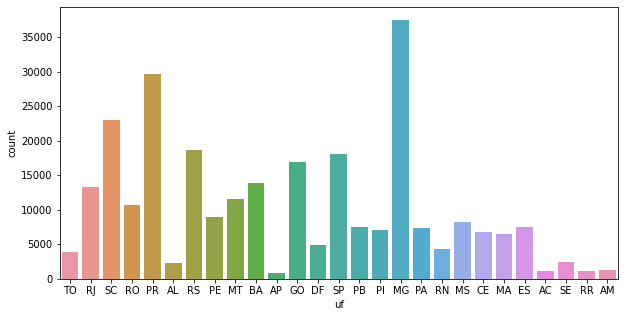

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(x='uf', data=df)

## A situação de Minas Gerais se deve por ser um estados  com as piores estradas do Brasil. Como mostra a reportagem: https://www.youtube.com/watch?v=I7VbXGGShqE

![Estradas](https://imgsapp.em.com.br/app/noticia_127983242361/2019/10/27/1096121/20191026212136165986o.png)

 ### Aqui nós podemos ver o top 10 dos municípios que mais ocorreram casos em 2020.
 
 ### Vamos verificar por municípios as principáis causas.

In [138]:
df['causa_acidente'].value_counts().head(10)


Falta de Atenção à Condução                          83955
Desobediência às normas de trânsito pelo condutor    41627
Velocidade Incompatível                              34258
Não guardar distância de segurança                   21423
Ingestão de Álcool                                   17874
Defeito Mecânico no Veículo                          10864
Pista Escorregadia                                    9683
Ultrapassagem Indevida                                7855
Condutor Dormindo                                     7669
Restrição de Visibilidade                             6535
Name: causa_acidente, dtype: int64

![falta de atenção](https://www.mtrans.com.br/wp-content/uploads/2019/12/Blog_Falta-de-aten%C3%A7%C3%A3o-no-transito.jpeg)

### Aqui nós podemos concluir que a hipótese estava certa, A causa mais frequênte no tránsito é a Falta de atenção.

### Podemos melhorar isso, com campanhas para mudar a forma de pensar dos condutores e assim melhoras os casos de acidentes no Brasil.

In [194]:
causa_morte = df.groupby(by=['causa_acidente','mortos']).count()['uf'].unstack()
causa_morte.query('causa_acidente == "Ingestão de Álcool" or causa_acidente == "Falta de Atenção à Condução" ')

#Aqui Podemos ver que a falta de atenção mata mais do que a Ingestão de bebidas alcoólicas.

mortos,0,1
causa_acidente,,
Falta de Atenção à Condução,81399,2556
Ingestão de Álcool,17071,803


------------------------------------------------------------------------------------------------------------------------------
## Vamos verificar em qual fase do dia mais ocorrem os acidentes em relação ao dia da semana. ##

<AxesSubplot:xlabel='fase_dia', ylabel='count'>

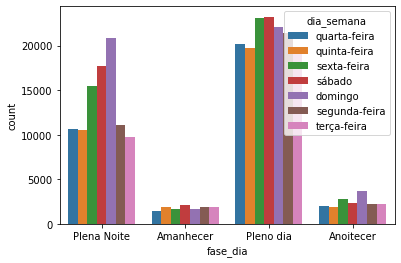

In [13]:
sns.countplot(x='fase_dia', data=df, hue ='dia_semana')

<AxesSubplot:xlabel='dia_semana', ylabel='count'>

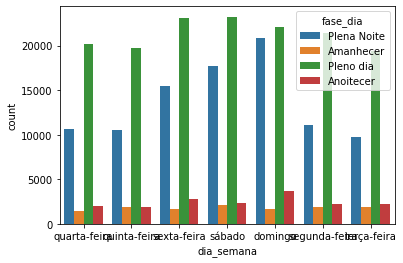

In [48]:
sns.countplot(x='dia_semana', data=df, hue ='fase_dia')

<AxesSubplot:xlabel='fase_dia', ylabel='dia_semana'>

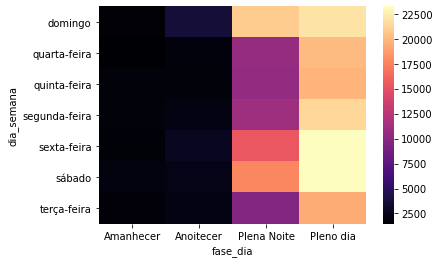

In [89]:
maior_causas = df.groupby(by=['dia_semana','fase_dia']).count()['municipio'].unstack()
sns.heatmap(maior_causas,cmap='magma')


# Por aqui conseguimos identificar que todos os dias da semana ocorrem acidentes.

## Logo podemos nos atentar que os casos ocorrem de forma mais intesa em Pleno dia e em Plena Noite.

### Será que isso tem alguma relação com os horários brasileiros? Vamos descobrir.

--------------------------------------------------------------------------
## Vamos trabalhar um pouco com datas nesse momento. Portanto é preciso verificar se as datas estão no tipo certo. ##

### Vamos verificar o tipo de dados na coluna "data_inversa" ##

In [19]:
type(df['data_inversa'].iloc[0]) # Agora já sabemos que vamos ter que realizar uma conversão de dados.

str

In [22]:
df['data_inversa'] = pd.to_datetime(df['data_inversa']) 
# Para transformar uma coluna em data, nós utilizamos uma ferramenta do pandas para facilitar

## Temos as datas prontas para trabalhar, Mas será que não é interesante separar os meses para obter um parâmetro um pouco mais preciso? ##

## Portando, vamos realizar uma função para aplicar essa nova coluna. ##

In [24]:
df['Mês'] = df['data_inversa'].apply(lambda data: data.month)
df.sample()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,Mês
92349,278026.0,620458.0,2020-04-01,quarta-feira,20:50:00,PI,316.0,"7,5",TERESINA,Não,...,0,1,0,0,"-5,15584638","-42,77173332",SR-PI,UOP02,DEL01,4


## Agora com os meses separados, podemos analisar de forma mais visual e objetiva.

<AxesSubplot:xlabel='Mês'>

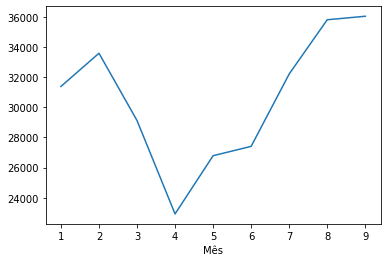

In [50]:
byData = df.groupby('Mês').count()
byData['municipio'].plot()

## Essa queda entre fevereiro até julho se deve a primeira onda da Pandemia, como explicado na matéria da Jovem Pam:

### _"A circulação de carros caiu mais de 50% nas estradas e rodovias. Entre a declaração da pandemia pela Organização Mundial da Saúde (OMS), de 10 a 13 de março, até a quarentena imposta, o movimento baixou de 8,2 milhões para 3,4 milhões veículos leves nas rodovias."_

#### https://jovempan.com.br/programas/jornal-da-manha/coronavirus-transito-estradas-cidades.html

![Queda do fluxo](https://jpimg.com.br/uploads/2018/12/WPP20181226019-1024x682.jpg)

<AxesSubplot:xlabel='Mês', ylabel='condicao_metereologica'>

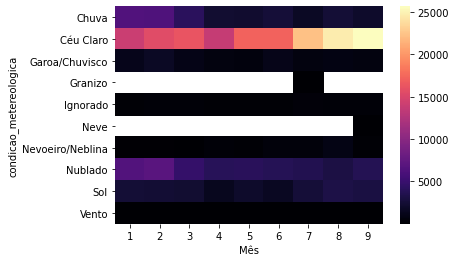

In [106]:
Mesmunicipio = df.groupby(by=['condicao_metereologica','Mês']).count()['municipio'].unstack()
sns.heatmap(Mesmunicipio,cmap='magma')

### Por aqui podemos verificar que os casos ficaram mais intensos no começo e no final do ano. E ainda sim os casos mais comuns em dias de Céu claro.

--------------------------------------------------------------
## Nesse mesmo pensamento, vamos atribuir uma coluna com somente as horas redondas para também termos um visão mais objetiva desses dados. ##

### Para isso vamos utilizar uma função! ###

In [27]:
df['Horas'] = df['horario'].apply(lambda h: h.split(':')[0])
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,Mês,Horas
0,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,1,01
1,260031.0,578986.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,1,01
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,1,01
3,260031.0,578991.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,1,01
4,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,0,1,0,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,1,01


<AxesSubplot:xlabel='Horas'>

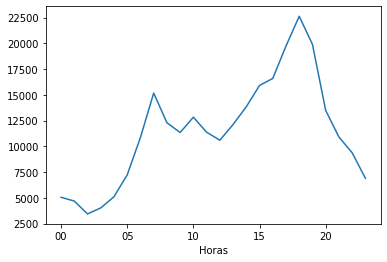

In [125]:
byData = df.groupby('Horas').count()
byData['municipio'].plot()

## Legal relatar que com essa análise, nós podemos ver que os horários que mais ocorrem acidentes são das 05hrs/10 hrs  e  das 15hrs as 20hrs.

## Creio que isso se deve pois são os horários de maior circulação de veículos em todo o Brasil por conta do horário de trabalho ou pelo horário comercial.

<AxesSubplot:xlabel='Horas', ylabel='dia_semana'>

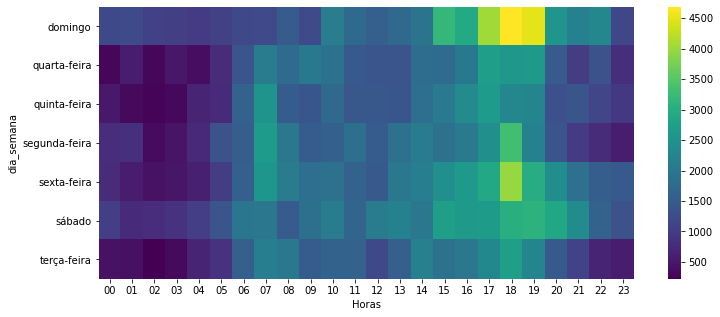

In [100]:
dayHour = df.groupby(by=['dia_semana','Horas']).count()['municipio'].unstack()
plt.figure(figsize=(12,5))
sns.heatmap(dayHour,cmap='viridis')

<AxesSubplot:xlabel='Mês', ylabel='dia_semana'>

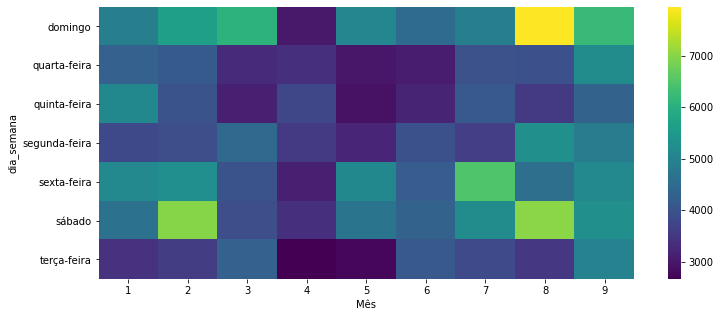

In [133]:
diames= df.groupby(by=['dia_semana','Mês']).count()['municipio'].unstack()
plt.figure(figsize=(12,5))
sns.heatmap(diames,cmap='viridis')

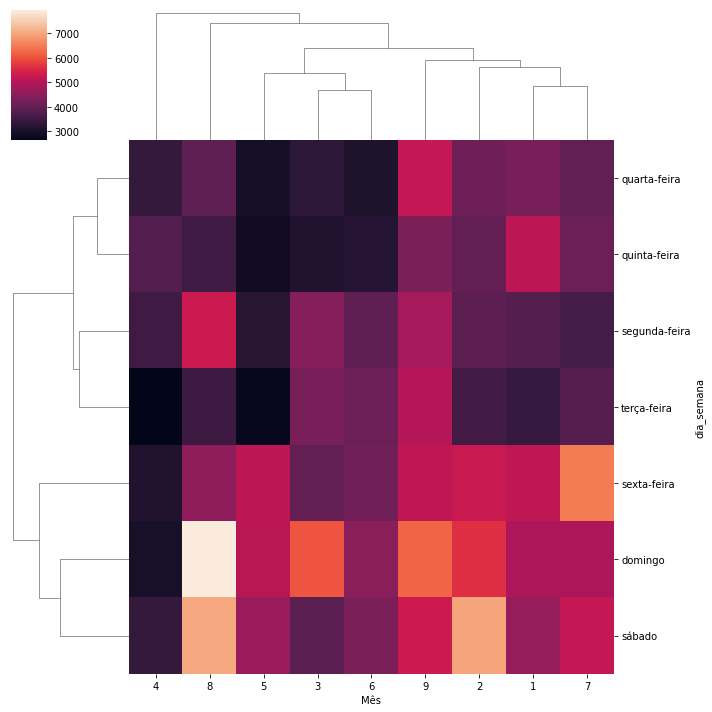

In [134]:
sns.clustermap(diames)

In [71]:
df['sexo'].value_counts()

Masculino        175484
Feminino          49934
Não Informado     48940
Ignorado            917
Name: sexo, dtype: int64

<AxesSubplot:xlabel='sexo', ylabel='count'>

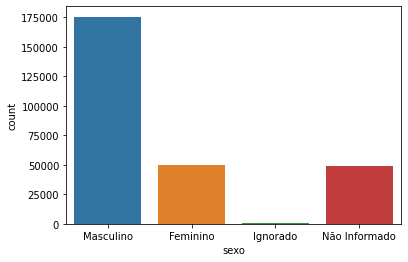

In [115]:
sns.countplot(x='sexo', data=df)

<AxesSubplot:xlabel='uf', ylabel='count'>

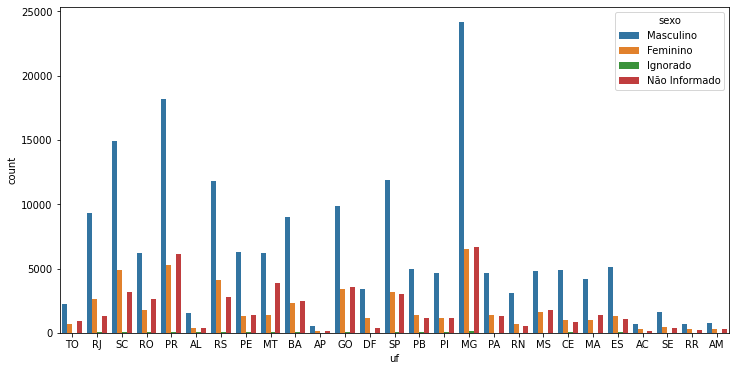

In [132]:
plt.figure(figsize=(12,6))
sns.countplot(x='uf', data=df, hue ='sexo')

<AxesSubplot:xlabel='Mês', ylabel='count'>

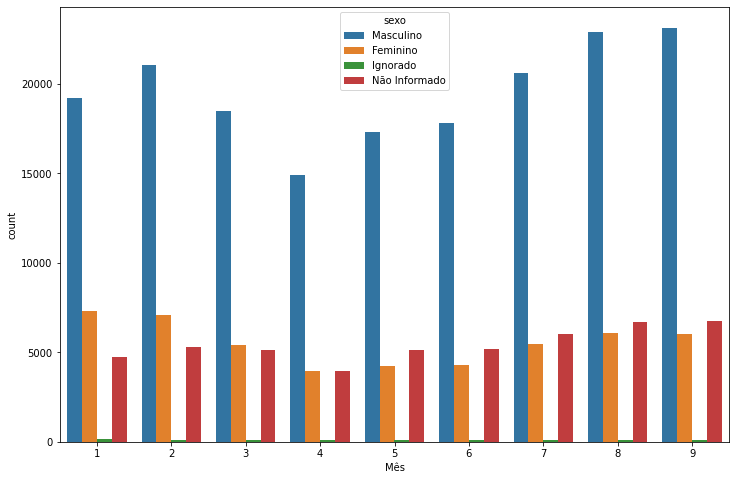

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(x='Mês', data=df, hue ='sexo')

In [117]:
x = 175484 + 49934 + 48940 + 917
x

275275


In [122]:
valorF = 49934 + 48940 + 917
valorF_M = 175484 - valorF
valorF_M

75693

## Será mesmo que as mulheres são tão "Barbeiras" assim? Concluímos que NÃO!

<Figure size 864x576 with 0 Axes>

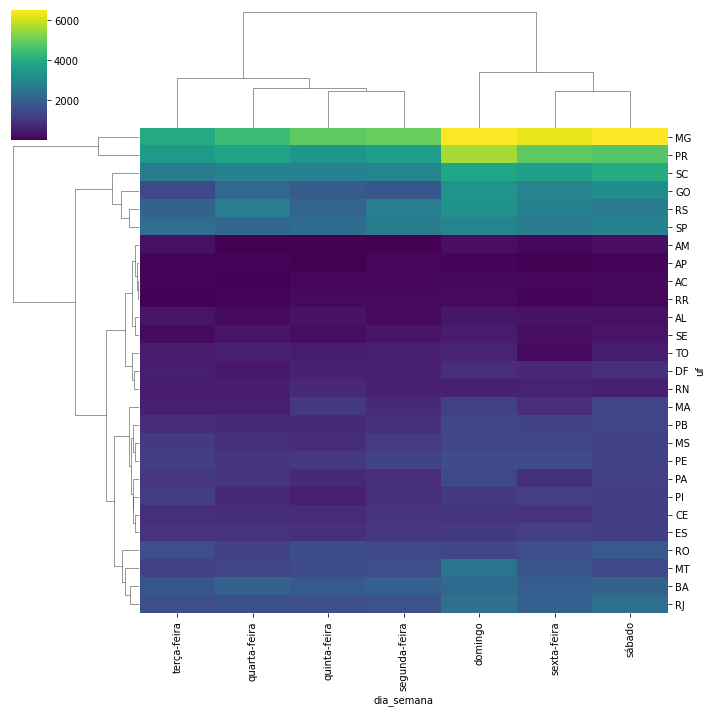

In [123]:
dia_uf = df.groupby(by=['uf','dia_semana']).count()['municipio'].unstack()
plt.figure(figsize=(12,8))
sns.clustermap(dia_uf,cmap='viridis')